                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None


label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64




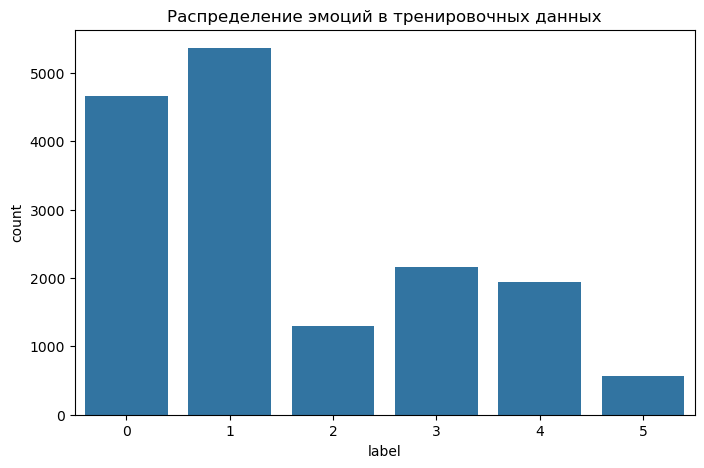

six basic emotions: anger, fear, joy, love, sadness, and surprise


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('training.csv')
val_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())

print('\n')

print(train_df.info())

print('\n')

print(train_df['label'].value_counts())

print('\n')

plt.figure(figsize=(8,5))
sns.countplot(x='label', data=train_df)
plt.title('Распределение эмоций в тренировочных данных')
plt.show()

with open('Read me 2 - Emosiyalar.txt', 'r', encoding='utf-8') as f:
    print(f.read())


--- Classification Report (Validation) ---
              precision    recall  f1-score   support

     sadness       0.91      0.87      0.89       550
         joy       0.91      0.88      0.89       704
        love       0.74      0.93      0.82       178
       anger       0.87      0.88      0.88       275
        fear       0.83      0.82      0.82       212
    surprise       0.73      0.81      0.77        81

    accuracy                           0.87      2000
   macro avg       0.83      0.86      0.85      2000
weighted avg       0.88      0.87      0.87      2000



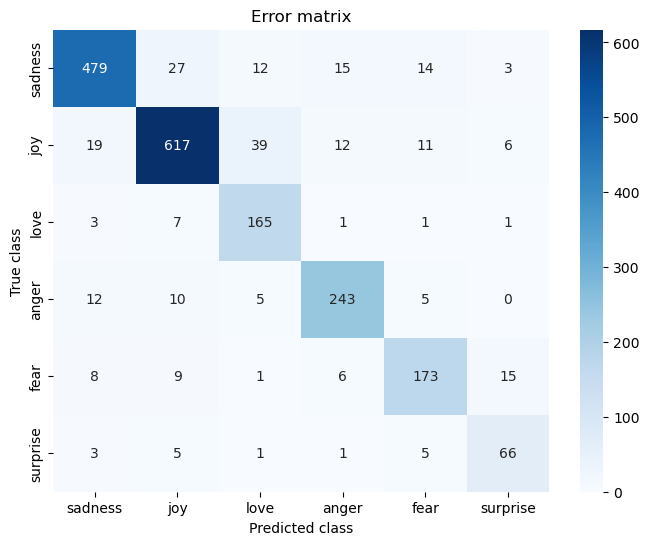

In [2]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('training.csv')
val_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    
    return text

train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)


X_train = train_df['cleaned_text']
y_train = train_df['label']

X_val = val_df['cleaned_text']
y_val = val_df['label']

model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('clf', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')) 
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_val)


print("\n--- Classification Report (Validation) ---")
print(classification_report(y_val, y_pred, target_names=emotion_map.values()))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=emotion_map.values(), 
            yticklabels=emotion_map.values())
plt.title('Error matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()